In [423]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [424]:
data_b_NO2=pd.read_excel("/content/O3_Data.xlsx",sheet_name='London')

In [425]:
check=pd.read_excel("/content/checkO3.xlsx")

In [426]:
check.head()

,Annual_Mean,Band
0,1,Low
1,2,Low
2,3,Low
3,4,Low
4,5,Low


In [427]:
df_b_NO2=data_b_NO2.groupby('Year').agg(O3_London=('Annual_Mean', 'mean')).reset_index()
df_b_NO2.head()

,Year,O3_London
0,2000,30.428571
1,2001,31.133333
2,2002,31.666667
3,2003,34.500000
4,2004,31.800000


In [428]:
year=df_b_NO2['Year']
y_test=df_b_NO2['O3_London']

In [429]:
X_train = check.drop(columns=['Band'])
y_train = check['Band']

In [430]:
import numpy as np

# Convert X_test from pandas Series to numpy array
year_array = year.to_numpy()

# Reshape X_test from 1D to 2D array
year_array_reshaped = year_array.reshape(-1, 1)


In [431]:
import numpy as np

# Convert X_test from pandas Series to numpy array
Y_test_array = y_test.to_numpy()

# Reshape X_test from 1D to 2D array
Y_test_reshaped = Y_test_array.reshape(-1, 1)

In [432]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(Y_test_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [433]:
svm_classifier = SVC(kernel='linear', C=2.0)

In [434]:
svm_classifier.fit(X_train, y_train)

SVC(C=2.0, kernel='linear')

In [435]:
y_pred = svm_classifier.predict(X_test)

In [436]:
y_pred

array(['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low'], dtype=object)

In [437]:
df_b_NO2

,Year,O3_London
0,2000,30.428571
1,2001,31.133333
2,2002,31.666667
3,2003,34.500000
4,2004,31.800000
5,2005,33.133333
6,2006,36.133333
7,2007,34.800000
8,2008,34.666667
9,2009,32.444444


In [438]:
classified_df=pd.DataFrame()

In [439]:
classifed_df=df_b_NO2[['Year','O3_London']]

In [440]:
band = 'Checkpoints'
classifed_df[band] = y_pred

In [441]:
classifed_df

,Year,O3_London,Checkpoints
0,2000,30.428571,Low
1,2001,31.133333,Low
2,2002,31.666667,Low
3,2003,34.500000,Low
4,2004,31.800000,Low
5,2005,33.133333,Low
6,2006,36.133333,Low
7,2007,34.800000,Low
8,2008,34.666667,Low
9,2009,32.444444,Low


<ipython-input-442-7af50458c3c7>:10: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(x='Year', y='O3_London', hue='Checkpoints', data=classifed_df, s=100, marker='X', palette=['green','yellow'])


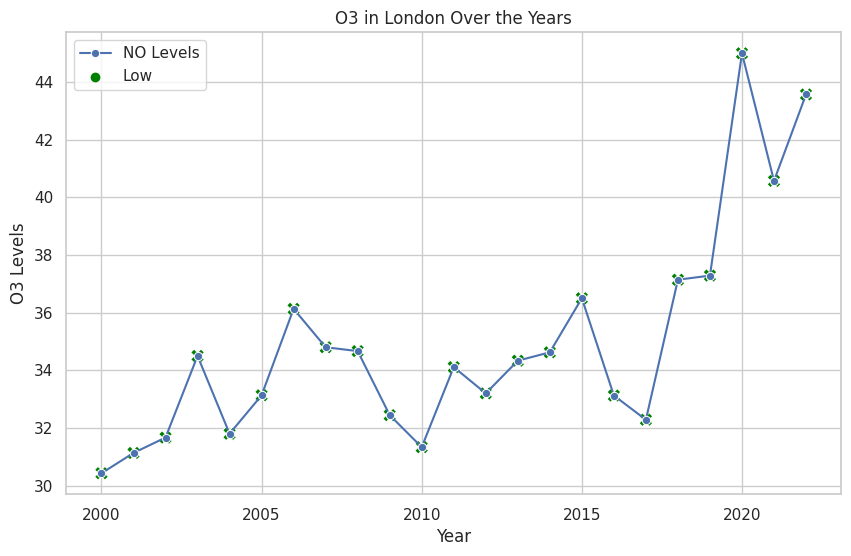

In [442]:
# Convert the 'Year' column to a proper datetime format


# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a line plot for NO2 levels over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='O3_London', data=classifed_df, marker='o', label='NO Levels')
sns.scatterplot(x='Year', y='O3_London', hue='Checkpoints', data=classifed_df, s=100, marker='X', palette=['green','yellow'])
plt.xlabel('Year')
plt.ylabel('O3 Levels')
plt.title('O3 in London Over the Years')
plt.legend()
plt.show()


In [443]:
from google.colab import files

In [444]:
csv_file_path = '/content/classified_London_O3.csv'
classifed_df.to_csv(csv_file_path, index=True)

In [445]:
files.download(csv_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>